<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/MobileRobot_FuzzyLogic_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


41.34615384615387


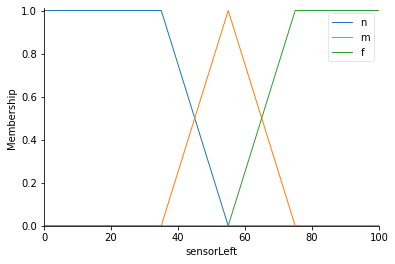

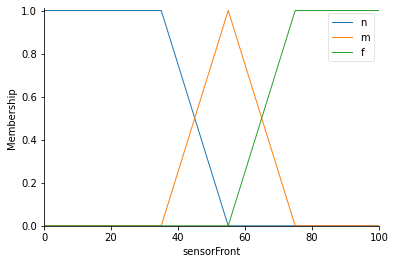

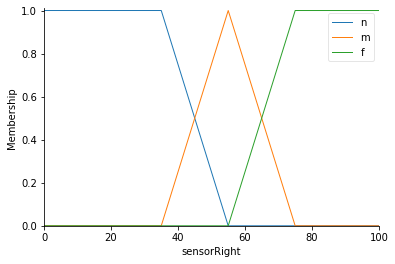

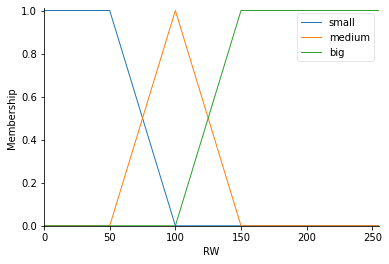

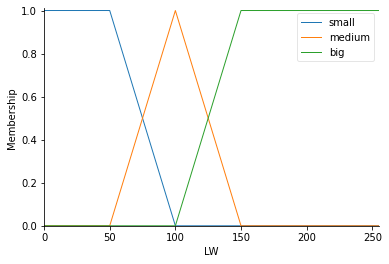

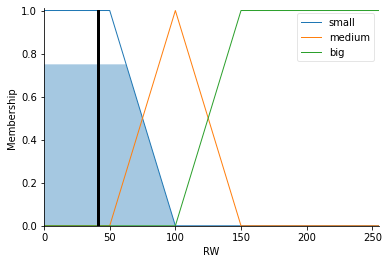

In [23]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

sL = ctrl.Antecedent(np.arange(0,101,1),'sensorLeft') # đổi: 1m = 100 cm 
sF = ctrl.Antecedent(np.arange(0,101,1),'sensorFront')
sR = ctrl.Antecedent(np.arange(0,101,1),'sensorRight')

RW   = ctrl.Consequent(np.arange(0,256,1),'RW') #tire1 right
LW   = ctrl.Consequent(np.arange(0,256,1),'LW') #tire2 left


sL['n']   = fuzz.trapmf(sL.universe,[0, 0, 35,55])
sL['m']   = fuzz.trimf(sL.universe,[35, 55, 75])
sL['f']   = fuzz.trapmf(sL.universe,[55, 75, 100, 100])

sF['n']   = fuzz.trapmf(sF.universe,[0, 0, 35,55])
sF['m']   = fuzz.trimf(sF.universe,[35, 55, 75])
sF['f']   = fuzz.trapmf(sF.universe,[55, 75, 100, 100])

sR['n']   = fuzz.trapmf(sR.universe,[0, 0, 35,55])
sR['m']   = fuzz.trimf(sR.universe,[35, 55, 75])
sR['f']   = fuzz.trapmf(sR.universe,[55, 75, 100, 100])

RW['small']   = fuzz.trapmf(RW.universe,[0, 0, 50, 100])
RW['medium']  = fuzz.trimf(RW.universe,[50, 100, 150])
RW['big']     = fuzz.trapmf(RW.universe,[100,150, 255, 255])

LW['small']   = fuzz.trapmf(LW.universe,[0, 0, 50, 100])
LW['medium']  = fuzz.trimf(LW.universe,[50, 100, 150])
LW['big']     = fuzz.trapmf(LW.universe,[100,150, 255, 255])

sL.view()
sF.view()
sR.view()
RW.view()
LW.view()

rule1 = ctrl.Rule(sL['n'] & sF['n'] & sR['n'] , LW['small'] & RW['small'] )
rule2 = ctrl.Rule(sL['n'] & sF['n'] & sR['m'] , LW['medium'] & RW['small'] )
rule3 = ctrl.Rule(sL['n'] & sF['n'] & sR['f'] , LW['big'] & RW['medium'] )
rule4 = ctrl.Rule(sL['n'] & sF['m'] & sR['n'] , LW['small'] & RW['small'] )
rule5 = ctrl.Rule(sL['n'] & sF['m'] & sR['m'] , LW['medium'] & RW['small'] )
rule6 = ctrl.Rule(sL['n'] & sF['m'] & sR['f'] , LW['big'] & RW['small'] )
rule7 = ctrl.Rule(sL['n'] & sF['f'] & sR['n'] , LW['medium'] & RW['medium'] )
rule8 = ctrl.Rule(sL['n'] & sF['f'] & sR['m'] , LW['big'] & RW['small'] )
rule9 = ctrl.Rule(sL['n'] & sF['f'] & sR['f'] , LW['big'] & RW['medium'] )

rule10 = ctrl.Rule(sL['m'] & sF['n'] & sR['n'] , LW['small'] & RW['big'] )
rule11 = ctrl.Rule(sL['m'] & sF['n'] & sR['m'] , LW['small'] & RW['small'] )
rule12 = ctrl.Rule(sL['m'] & sF['n'] & sR['f'] , LW['big'] & RW['small'] )
rule13 = ctrl.Rule(sL['m'] & sF['m'] & sR['n'] , LW['small'] & RW['big'] )
rule14 = ctrl.Rule(sL['m'] & sF['m'] & sR['m'] , LW['medium'] & RW['medium'] )
rule15 = ctrl.Rule(sL['m'] & sF['m'] & sR['f'] , LW['medium'] & RW['small'] )
rule16 = ctrl.Rule(sL['m'] & sF['f'] & sR['n'] , LW['small'] & RW['big'] )
rule17 = ctrl.Rule(sL['m'] & sF['f'] & sR['m'] , LW['medium'] & RW['medium'] )
rule18 = ctrl.Rule(sL['m'] & sF['f'] & sR['f'] , LW['big'] & RW['medium'] )

rule19 = ctrl.Rule(sL['f'] & sF['n'] & sR['n'] , LW['small'] & RW['big'] )
rule20 = ctrl.Rule(sL['f'] & sF['n'] & sR['m'] , LW['small'] & RW['medium'] )
rule21 = ctrl.Rule(sL['f'] & sF['n'] & sR['f'] , LW['small'] & RW['big'] )
rule22 = ctrl.Rule(sL['f'] & sF['m'] & sR['n'] , LW['medium'] & RW['medium'] )
rule23 = ctrl.Rule(sL['f'] & sF['m'] & sR['m'] , LW['medium'] & RW['big'] )
rule24 = ctrl.Rule(sL['f'] & sF['m'] & sR['f'] , LW['medium'] & RW['big'] )
rule25 = ctrl.Rule(sL['f'] & sF['f'] & sR['n'] , LW['small'] & RW['big'] )
rule26 = ctrl.Rule(sL['f'] & sF['f'] & sR['m'] , LW['medium'] & RW['big'] )
rule27 = ctrl.Rule(sL['f'] & sF['f'] & sR['f'] , LW['big'] & RW['big'] )

pwm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10, rule11, rule12, rule13, rule14, rule15, rule16,rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
pwming = ctrl.ControlSystemSimulation(pwm_ctrl)
pwming.input['sensorLeft']  = 10
pwming.input['sensorFront'] = 50  
pwming.input['sensorRight'] = 20
pwming.compute()
print(pwming.output['RW'])
RW.view(sim = pwming)

